In [1]:
import pandas as pd
import glob as glob

In [2]:
csv_data_path = 'rawdata/'
csvfiles = glob.glob(csv_data_path + '*.csv')
print(csvfiles)
df = pd.DataFrame()
all_data = pd.DataFrame()

len(csvfiles)

['rawdata/fuelDensity.csv', 'rawdata/fuelTemp.csv', 'rawdata/fuelVolumeFlowRate.csv', 'rawdata/inclinometer-raw.csv', 'rawdata/speedKnots.csv', 'rawdata/starboardPitch.csv', 'rawdata/starboardRudder.csv', 'rawdata/windAngle.csv', 'rawdata/windSpeed.csv']


9

The data spans a period of almost two months, February 16th to April 12th, 2010.

In [3]:
# As the datevalues are in 100ns, and according to the paper the dataset starts at 2010-02-16, thats why
# the index is re-indexed for each file.

df = pd.DataFrame()
for i in range(len(csvfiles)):
    print('Processing: '+str(csvfiles[i].split('/')[-1].split('.')[0]))
    if not 'tude' in csvfiles[i]:
        df = pd.read_csv(csvfiles[i],header=None,index_col=0,dtype='a')
        print('Converting datetime')
        df.index = pd.to_datetime((df.index-634018095139168000)/1e7,unit='s',origin='2010-02-16')
        print('Converting datetime, done ...')
        #df.index = pd.to_datetime(df.index)
        df[df.columns[0]] = pd.to_numeric(df[df.columns[0]]) 
        df.index.names = ['Date']
        df = df.rename(columns={ df.columns[0]: csvfiles[i].split('/')[-1].split('.')[0] })
        #df[csvfiles[i]] = pd.read_csv(csvfiles[i],header=None,index_col=0,dtype='a')
        all_data = all_data.append(df,sort=True)
        all_data = all_data.resample('1min').mean()
        #df=df.resample('1s').mean()
        # Clean up memory
        del df
        print(str(i+1) + ' done of ' + str(len(csvfiles)))
    #df = pd.read_csv(csvfiles[i],header=None,index_col=0,dtype='a')


print('All done!')

Processing: fuelDensity
Converting datetime
Converting datetime, done ...
1 done of 9
Processing: fuelTemp
Converting datetime
Converting datetime, done ...
2 done of 9
Processing: fuelVolumeFlowRate
Converting datetime
Converting datetime, done ...
3 done of 9
Processing: inclinometer-raw
Converting datetime
Converting datetime, done ...
4 done of 9
Processing: speedKnots
Converting datetime
Converting datetime, done ...
5 done of 9
Processing: starboardPitch
Converting datetime
Converting datetime, done ...
6 done of 9
Processing: starboardRudder
Converting datetime
Converting datetime, done ...
7 done of 9
Processing: windAngle
Converting datetime
Converting datetime, done ...
8 done of 9
Processing: windSpeed
Converting datetime
Converting datetime, done ...
9 done of 9
All done!


In [4]:
all_data.dropna()

,fuelDensity,fuelTemp,fuelVolumeFlowRate,inclinometer-raw,speedKnots,starboardPitch,starboardRudder,windAngle,windSpeed
Date,,,,,,,,,
2010-02-17 07:03:00,0.934025,90.419065,0.372824,357.440403,1.682258,2.564000,2.414050,260.700000,15.823333
2010-02-17 07:04:00,0.931635,92.398794,0.430857,357.857317,6.953333,5.764500,-1.215100,226.266667,14.970000
2010-02-17 07:05:00,0.933324,91.742111,0.412590,357.490806,11.632258,6.339667,1.264183,240.600000,12.686667
2010-02-17 07:06:00,0.935355,89.333152,0.488651,357.372258,13.283607,7.169367,0.523333,293.400000,21.266667
2010-02-17 07:07:00,0.932336,90.872902,0.478884,357.233821,15.614516,7.538550,-0.264900,310.066667,24.506667
...,...,...,...,...,...,...,...,...,...
2010-04-13 16:36:00,0.929180,97.281418,0.417196,357.257391,1.669643,-6.051400,-0.018709,15.892857,2.900000
2010-04-13 16:37:00,0.929383,97.263808,0.329081,357.257573,2.188889,-4.352431,1.701765,329.480000,0.896000
2010-04-13 16:38:00,0.929587,97.210036,0.284063,357.353629,2.863333,-1.608067,8.515100,303.300000,0.523333


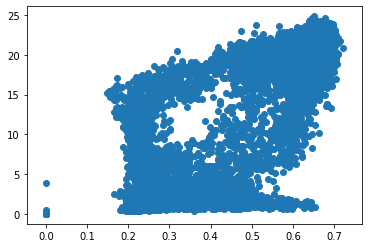

In [5]:
from matplotlib import pyplot as plt


plt.scatter(all_data['fuelVolumeFlowRate'],all_data['speedKnots'])


In [8]:
all_data = all_data.dropna()

In [10]:
all_data.to_hdf('dtu_data_200210.hd5','table',complib='blosc',complevel=9)

Populating the interactive namespace from numpy and matplotlib


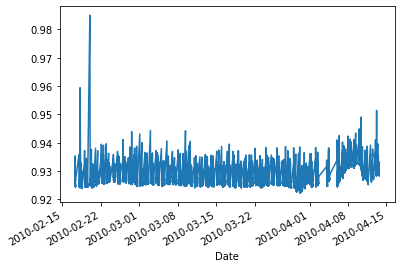

In [9]:
%pylab inline
all_data['fuelDensity'].plot()

In [11]:
df_in = pd.read_hdf('dtu_data_200210.hd5','table')

In [13]:
df_in.describe()

,fuelDensity,fuelTemp,fuelVolumeFlowRate,inclinometer-raw,speedKnots,starboardPitch,starboardRudder,windAngle,windSpeed
count,27989.000000,27989.000000,27989.000000,27989.000000,27989.000000,27989.000000,27989.000000,27989.000000,27989.000000
mean,0.926742,97.495162,0.585865,357.258274,17.790143,7.302772,0.190599,165.475000,13.873588
std,0.002549,2.018294,0.118143,0.145314,5.289917,2.757480,1.755135,135.502653,7.204126
min,0.922152,14.380964,0.000000,351.826048,0.200000,-8.109757,-8.177967,0.000000,0.000000
25%,0.925171,96.804502,0.592833,357.206935,18.300000,8.011800,-0.099567,25.733333,8.063333
50%,0.925896,97.832696,0.629456,357.250000,19.476667,8.258717,-0.041627,157.900000,13.386667
75%,0.927322,98.544494,0.647996,357.296016,20.443548,8.410400,0.016550,311.333333,19.143333
max,0.985009,103.831503,0.720782,358.117016,24.853968,8.904783,8.622900,357.366667,36.830000


In [5]:
### Testing ...



pd.to_datetime((df.index-634018095139168000)/1e7,unit='s',origin='2010-02-16')

DatetimeIndex(['2010-02-15 23:59:59.176038027',
               '2010-02-15 23:59:59.662442923',
               '2010-02-16 00:00:00.148231983',
               '2010-02-16 00:00:00.633704901',
               '2010-02-16 00:00:01.119421959',
               '2010-02-16 00:00:01.604160070',
               '2010-02-16 00:00:02.088880062',
               '2010-02-16 00:00:02.573904991',
               '2010-02-16 00:00:03.060281992',
               '2010-02-16 00:00:03.545996904',
               ...
               '2010-04-13 16:39:57.951354027',
               '2010-04-13 16:39:58.440388918',
               '2010-04-13 16:39:58.925780058',
               '2010-04-13 16:39:59.411482096',
               '2010-04-13 16:39:59.896203041',
               '2010-04-13 16:40:00.382380962',
               '2010-04-13 16:40:00.867638111',
               '2010-04-13 16:40:01.353343964',
               '2010-04-13 16:40:01.838080883',
               '2010-04-13 16:40:02.323769093'],
              dtype=